### sentinel-1

In [1]:
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import cm
import datacube
from datacube.storage import masking
from datacube.helpers import write_geotiff
from datacube.utils.geometry import CRS
dc = datacube.Datacube(env='lccs_dev', app="S1")

In [2]:
# Define area of interest

# # Ayr
# x = (1500000, 1600000)
# y = (-2200000, -2100000)

# # Diamentina
# x = (800000, 900000)
# y = (-2800000, -2700000)

# # Gwydir
# x = (1600000, 1700000)
# y = (-3400000, -3300000)

# # Leichhardt
# x = (800000, 900000)
# y = (-2000000, -1900000)

# Kakadu
x = (0, 100000)
y = (-1350000, -1250000)

# # Hobart
# x = (1200000, 1300000)
# y = (-4800000, -4700000)

# # Perth
# x = (-1550000, -1450000)
# y = (-3650000, -3550000)

# # Murray Valley
# x = (1100000, 1200000)
# y = (-4000000, -3900000)

# # Adelaide
# x = (550000, 650000)
# y = (-3850000, -3750000)

# # Lake Eyre
# x = (500000, 600000)
# y = (-3000000, -2900000)

# # Blue mountains
# x = (1600000, 1700000)
# y = (-3900000, -3800000)

# # Australian Alps
# x = (1400000, 1500000)
# y = (-4100000, -4000000)

# # Collier Range
# x = (-1300000, -1200000)
# y = (-2700000, -2600000)

# # Coorong
# x = (600000, 700000)
# y = (-3950000, -3850000)

# # Brisbane
# x = (2000000, 2100000)
# y = (-3200000, -3100000)

# # Dundas
# x = (-1000000, -900000)
# y = (-3650000, -3550000)

res = (-25, 25)
crs = "EPSG:3577"
output_crs = "EPSG:3577"
time = ("2017-01-01", "2017-01-15")
sensor = 'ls7'
query =({'x':x,
        'y':y,
         'crs':crs,
        'output_crs':crs,
        'resolution':res,
        'time':time})

In [5]:
# Load S1
radar = dc.load(product='s1_gamma0_scene', **query)

# # Load Landsat
# geomedian = dc.load(product=sensor + "_nbart_geomedian_annual", time=time, **query)
# geomedian = masking.mask_invalid_data(geomedian).squeeze().drop('time')
radar

<xarray.Dataset>
Dimensions:  (time: 6, x: 4000, y: 4000)
Coordinates:
  * time     (time) datetime64[ns] 2017-01-03T20:40:02.703134 ... 2017-01-15T20:40:29.285947
  * y        (y) float64 -1.25e+06 -1.25e+06 -1.25e+06 ... -1.35e+06 -1.35e+06
  * x        (x) float64 12.5 37.5 62.5 87.5 ... 9.994e+04 9.996e+04 9.999e+04
Data variables:
    vh       (time, y, x) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    vv       (time, y, x) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    crs:      EPSG:3577

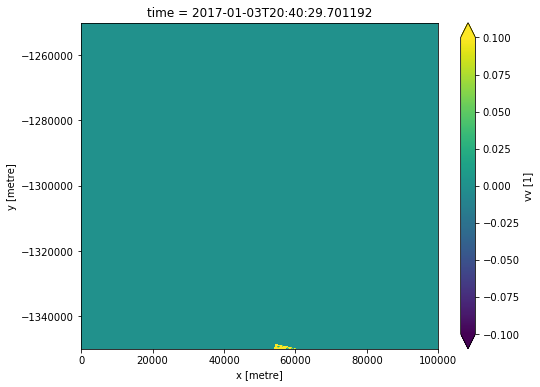

In [4]:
radar.isel(time=1).vv.plot(figsize=(8, 6), robust=True)

In [ ]:
plt.figure(figsize=(15,10))
gs = gridspec.GridSpec(2,2) # set up a grid of images for better presentation

ax1=plt.subplot(gs[0,0])
geomedian[['red', 'green', 'blue']].to_array().plot.imshow(robust=True)
ax1.set_title('geomedian')

ax2=plt.subplot(gs[0,1])
fc_ann["PV_PC_90"].plot.imshow(cmap='jet')
ax2.set_title('PV_90')

ax3=plt.subplot(gs[1,0])
fc_ann["NPV_PC_90"].plot.imshow(cmap='jet')
ax3.set_title('NPV_90')

ax4=plt.subplot(gs[1,1])
fc_ann["BS_PC_90"].plot.imshow(cmap='jet')
ax4.set_title('BS_90')

plt.tight_layout()
plt.show()
# fc_ann["PV_PC_90"].plot.imshow(figsize=(8, 6), cmap='jet')

In [ ]:
# %matplotlib notebook
vegetat = ((fc_ann["PV_PC_90"] >= 50) | ((fc_ann["NPV_PC_90"] >= 50) & (fc_ann["NPV_PC_90"] <= 80)))
vegetat.plot.imshow(figsize=(8, 6))

In [ ]:
# Trying different thresholds

# fc = (fc_ann["PV_PC_50"])
# fc10 = ((fc_ann["PV_PC_90"] >= 10))
# fc20 = ((fc_ann["PV_PC_90"] >= 20))
# fc30 = ((fc_ann["PV_PC_90"] >= 30))
# fc40 = ((fc_ann["PV_PC_90"] >= 40))
# fc50 = ((fc_ann["PV_PC_90"] >= 50))
# fc60 = ((fc_ann["PV_PC_90"] >= 60))
# fc70 = ((fc_ann["PV_PC_90"] >= 70))
# fc80 = ((fc_ann["PV_PC_90"] >= 80))
# fc90 = ((fc_ann["PV_PC_90"] >= 90))
# fc100 = ((fc_ann["PV_PC_90"] >= 100))

# fc = (fc_ann["NPV_PC_90"])
# fc10 = ((fc_ann["NPV_PC_90"] >= 10))
# fc20 = ((fc_ann["NPV_PC_90"] >= 20))
# fc30 = ((fc_ann["NPV_PC_90"] >= 30))
# fc40 = ((fc_ann["NPV_PC_90"] >= 40))
# fc50 = ((fc_ann["NPV_PC_90"] >= 50))
# fc60 = ((fc_ann["NPV_PC_90"] >= 60))
# fc70 = ((fc_ann["NPV_PC_90"] >= 70))
# fc80 = ((fc_ann["NPV_PC_90"] >= 80))
# fc90 = ((fc_ann["NPV_PC_90"] >= 90))
# fc100 = ((fc_ann["NPV_PC_90"] >= 100))

# fc = (fc_ann["BS_PC_90"])
# fc10 = ((fc_ann["BS_PC_90"] >= 10))
# fc20 = ((fc_ann["BS_PC_90"] >= 20))
# fc30 = ((fc_ann["BS_PC_90"] >= 30))
# fc40 = ((fc_ann["BS_PC_90"] >= 40))
# fc50 = ((fc_ann["BS_PC_90"] >= 50))
# fc60 = ((fc_ann["BS_PC_90"] >= 60))
# fc70 = ((fc_ann["BS_PC_90"] >= 70))
# fc80 = ((fc_ann["BS_PC_90"] >= 80))
# fc90 = ((fc_ann["BS_PC_90"] >= 90))
# fc100 = ((fc_ann["BS_PC_90"] >= 100))

fc = (fc_ann["PV_PC_90"] + fc_ann["NPV_PC_90"])
fc10 = ((fc_ann["PV_PC_90"] >= 10) | (fc_ann["NPV_PC_90"] >= 10))
fc20 = ((fc_ann["PV_PC_90"] >= 20) | (fc_ann["NPV_PC_90"] >= 20))
fc30 = ((fc_ann["PV_PC_90"] >= 30) | (fc_ann["NPV_PC_90"] >= 30))
fc40 = ((fc_ann["PV_PC_90"] >= 40) | (fc_ann["NPV_PC_90"] >= 40))
fc50 = ((fc_ann["PV_PC_90"] >= 50) | (fc_ann["NPV_PC_90"] >= 50))
fc60 = ((fc_ann["PV_PC_90"] >= 60) | (fc_ann["NPV_PC_90"] >= 60))
fc70 = ((fc_ann["PV_PC_90"] >= 70) | (fc_ann["NPV_PC_90"] >= 70))
fc80 = ((fc_ann["PV_PC_90"] >= 80) | (fc_ann["NPV_PC_90"] >= 80))
fc90 = ((fc_ann["PV_PC_90"] >= 90) | (fc_ann["NPV_PC_90"] >= 90))
fc100 = ((fc_ann["PV_PC_90"] >= 100) | (fc_ann["NPV_PC_90"] >= 100))

plt.figure(figsize=(15,10))
gs = gridspec.GridSpec(4,3) # set up a grid of images for better presentation

ax1=plt.subplot(gs[0,0])
geomedian[['red', 'green', 'blue']].to_array().plot.imshow(robust=True)
ax1.set_title('geomedian')

ax2=plt.subplot(gs[0,1])
fc.plot.imshow(cmap='jet')
ax2.set_title('fc')

ax3=plt.subplot(gs[0,2])
fc10.plot.imshow(cmap='bwr')
ax3.set_title('fc10')

ax4=plt.subplot(gs[1,0])
fc20.plot.imshow(cmap='bwr')
ax4.set_title('fc20')

ax5=plt.subplot(gs[1,1])
fc30.plot.imshow(cmap='bwr')
ax5.set_title('fc30')

ax6=plt.subplot(gs[1,2])
fc40.plot.imshow(cmap='bwr')
ax6.set_title('fc40')

ax7=plt.subplot(gs[2,0])
fc50.plot.imshow(cmap='bwr')
ax7.set_title('fc50')

ax8=plt.subplot(gs[2,1])
fc60.plot.imshow(cmap='bwr')
ax8.set_title('fc60')

ax9=plt.subplot(gs[2,2])
fc70.plot.imshow(cmap='bwr')
ax9.set_title('fc70')

ax10=plt.subplot(gs[3,0])
fc80.plot.imshow(cmap='bwr')
ax10.set_title('fc80')

ax11=plt.subplot(gs[3,1])
fc90.plot.imshow(cmap='bwr')
ax11.set_title('fc90')

ax12=plt.subplot(gs[3,2])
fc100.plot.imshow(cmap='bwr')
ax12.set_title('fc100')

plt.tight_layout()
plt.show()

In [ ]:
# # write to geotiff - change XX.to_dataset
# fc_out = fc20.to_dataset(name="array")
# fc_out = fc_out.astype(dtype="int8")
# fc_out.attrs['crs'] = CRS(fc_ann.crs)
# write_geotiff(filename='fc_out.tif', dataset=fc_out)